In [1]:
import xarray as xr           #----xarray is used to open and read and manage .nc files
import numpy as np            #--------we can perform various calculations using 'numpy' 
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from netCDF4 import Dataset
from scipy import stats
import matplotlib.patches as mpatches

In [2]:
#fname='India_stateboundary/India_State_Boundary_Updated.shp'
fname='Homogeneous Region Shape File1 (1)/Homogeneous Region Shape File1.shp'

ds1 = xr.open_dataset('IMD_RF_mon_1901_2021_new.nc')
ds1

<xarray.Dataset>
Dimensions:    (time: 1452, bnds: 2, LONGITUDE: 135, LATITUDE: 129)
Coordinates:
  * time       (time) datetime64[ns] 1901-01-16 ... 2021-12-16
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (time, bnds) datetime64[ns] ...
    RAINFALL   (time, LATITUDE, LONGITUDE) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.0
    history:      Fri Apr 29 17:36:08 2022: cdo mergetime IMD_RF_mon_1901_202...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [3]:
# --- Define 'lons','lats' variables
lons = ds1['LONGITUDE'][:]  
lats = ds1['LATITUDE'][:] 
# --- select JJAS months
rf = ds1['RAINFALL'].sel(time=np.in1d(ds1['time.month'], [6, 7, 8, 9]))
rf

<xarray.DataArray 'RAINFALL' (time: 484, LATITUDE: 129, LONGITUDE: 135)>
[8428860 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1901-06-15T12:00:00 ... 2021-09-15T12:00:00
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

In [5]:
#Prepare JJAS Climatology 1981-2021 
r=rf[320:484,:,:]
r

<xarray.DataArray 'RAINFALL' (time: 164, LATITUDE: 129, LONGITUDE: 135)>
[2856060 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1981-06-15T12:00:00 ... 2021-09-15T12:00:00
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

In [6]:
r_jun=r.sel(time=np.in1d(r['time.month'], [6]))
r_JUN=r_jun.to_numpy()
print(r_JUN.shape)

(41, 129, 135)


In [7]:
r_jul=r.sel(time=np.in1d(r['time.month'], [7]))
r_jul
r_JUL=r_jul.to_numpy()
print(r_JUL.shape)

(41, 129, 135)


In [8]:
r_aug=r.sel(time=np.in1d(r['time.month'], [8]))
r_aug
r_AUG=r_aug.to_numpy()
print(r_AUG.shape)

(41, 129, 135)


In [9]:
r_sep=r.sel(time=np.in1d(r['time.month'], [9]))
r_sep
r_SEP=r_sep.to_numpy()
r_SEP
print(r_SEP.shape)

(41, 129, 135)


In [12]:
r_JJAS=(r_JUN+r_JUL+r_AUG+r_SEP)/4
r_JJAS
print(r_JJAS.shape)

(41, 129, 135)


In [13]:
rf_clim= np.mean(r_JJAS,axis=0)
rf_clim

rf_climJun= np.mean(r_JUN,axis=0)
rf_climJul= np.mean(r_JUL,axis=0)
rf_climAug= np.mean(r_AUG,axis=0)
rf_climSep= np.mean(r_SEP,axis=0)

print(rf_clim.shape)
print(rf_climJun.shape)
print(rf_climJul.shape)
print(rf_climAug.shape)
print(rf_climSep.shape)

(129, 135)
(129, 135)
(129, 135)
(129, 135)
(129, 135)


In [14]:
#rf_JJAS_ano=((r_JJAS-rf_clim)/rf_clim)*100
rf_JJAS_ano=r_JJAS-rf_clim
rf_JJAS_ano

rf_Jun_ano=r_JUN-rf_climJun
rf_Jul_ano=r_JUL-rf_climJul
rf_Aug_ano=r_AUG-rf_climAug
rf_Sep_ano=r_SEP-rf_climSep

print(rf_JJAS_ano.shape)
print(rf_Jun_ano.shape)
print(rf_Jul_ano.shape)
print(rf_Aug_ano.shape)
print(rf_Sep_ano.shape)

(41, 129, 135)
(41, 129, 135)
(41, 129, 135)
(41, 129, 135)
(41, 129, 135)


In [15]:
ano_1997_JJAS =rf_JJAS_ano[(16), :, :]
ano_1997_Jun =rf_Jun_ano[(16), :, :]
ano_1997_Jul =rf_Jul_ano[(16), :, :]
ano_1997_Aug =rf_Aug_ano[(16), :, :]
ano_1997_Sep =rf_Sep_ano[(16), :, :]

In [16]:
tval_1=stats.ttest_ind(ano_1997_Jun,rf_Jun_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_2=stats.ttest_ind(ano_1997_Jul,rf_Jul_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_3=stats.ttest_ind(ano_1997_Aug,rf_Aug_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_4=stats.ttest_ind(ano_1997_Sep,rf_Sep_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_5=stats.ttest_ind(ano_1997_JJAS,rf_JJAS_ano,axis=0,equal_var=True, nan_policy='propagate')

In [17]:
ano_2015_JJAS =rf_JJAS_ano[(34), :, :]
ano_2015_Jun =rf_Jun_ano[(34), :, :]
ano_2015_Jul =rf_Jul_ano[(34), :, :]
ano_2015_Aug =rf_Aug_ano[(34), :, :]
ano_2015_Sep =rf_Sep_ano[(34), :, :]

In [18]:
tval_6=stats.ttest_ind(ano_2015_Jun,rf_Jun_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_7=stats.ttest_ind(ano_2015_Jul,rf_Jul_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_8=stats.ttest_ind(ano_2015_Aug,rf_Aug_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_9=stats.ttest_ind(ano_2015_Sep,rf_Sep_ano,axis=0,equal_var=True, nan_policy='propagate')
tval_10=stats.ttest_ind(ano_2015_JJAS,rf_JJAS_ano,axis=0,equal_var=True, nan_policy='propagate')

In [19]:
diff_JJAS=ano_1997_JJAS-ano_2015_JJAS
diff_Jun=ano_1997_Jun-ano_2015_Jun
diff_Jul=ano_1997_Jul-ano_2015_Jul
diff_Aug=ano_1997_Aug-ano_2015_Aug
diff_Sep=ano_1997_Sep-ano_2015_Sep

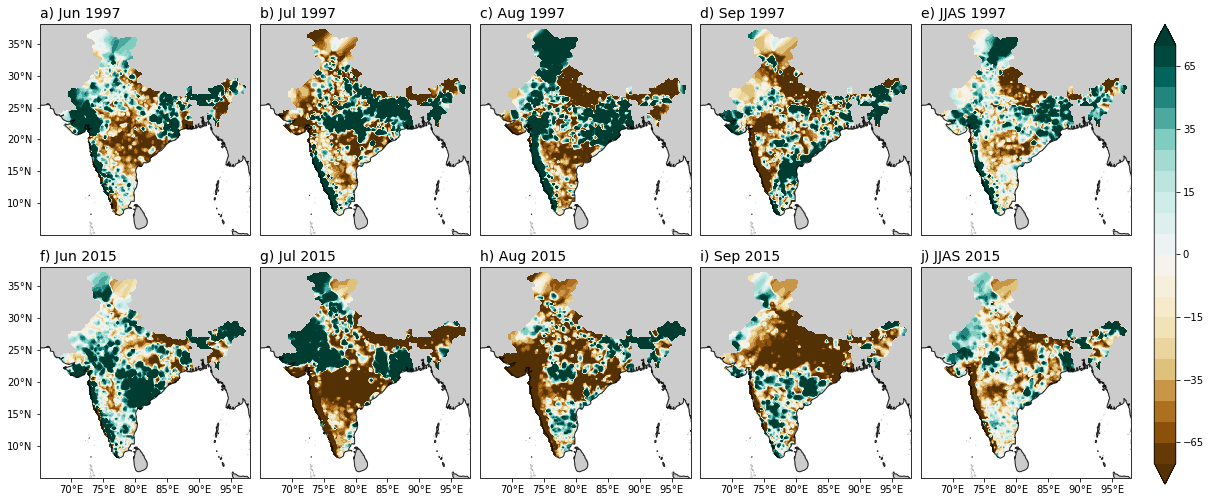

In [21]:
fig, ax = plt.subplots(2,5, figsize=(20, 9),subplot_kw={"projection": ccrs.PlateCarree()})

ax[0,0].set_title('a) Jun 1997',fontsize=14, loc='left')
clevs = [-75,-65,-55,-45,-35,-25,-20,-15,-10,-5,0,5,10,15,20,25,35,45,55,65,75]
cf1 = ax[0,0].contourf(lons,lats,ano_1997_Jun,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,0].coastlines(alpha=0.8)
# ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,0].contourf(lons, lats, tval_1[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)#ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,0].set_extent([65, 98,5 ,37])
ax[0,0].set_yticks([10,15,20,25,30,35], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax[0,0].xaxis.set_major_formatter(lon_formatter)
ax[0,0].yaxis.set_major_formatter(lat_formatter)
ax[0,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,1].set_title('b) Jul 1997',fontsize=14, loc='left')
cf2 = ax[0,1].contourf(lons,lats,ano_1997_Jul,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,1].coastlines(alpha=0.8)
# ax[0,1].contourf(lons, lats, tval_2[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[0,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,1].set_extent([65, 98,5 ,37])
ax[0,1].xaxis.set_major_formatter(lon_formatter)
ax[0,1].yaxis.set_major_formatter(lat_formatter)
ax[0,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,2].set_title('c) Aug 1997',fontsize=14, loc='left')
cf3 = ax[0,2].contourf(lons,lats,ano_1997_Aug,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,2].coastlines(alpha=0.8)
ax[0,2].contourf(lons, lats, tval_3[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[0,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,2].set_extent([65, 98,5 ,37])
ax[0,2].xaxis.set_major_formatter(lon_formatter)
ax[0,2].yaxis.set_major_formatter(lat_formatter)
ax[0,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,3].set_title('d) Sep 1997',fontsize=14, loc='left')
cf4 = ax[0,3].contourf(lons,lats,ano_1997_Sep,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,3].coastlines(alpha=0.8)
ax[0,3].contourf(lons, lats, tval_4[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[0,3].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,3].set_extent([65, 98,5 ,37])
ax[0,3].xaxis.set_major_formatter(lon_formatter)
ax[0,3].yaxis.set_major_formatter(lat_formatter)
ax[0,3].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,4].set_title('e) JJAS 1997',fontsize=14, loc='left')
cf5 = ax[0,4].contourf(lons,lats,ano_1997_JJAS,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,4].coastlines(alpha=0.8)
ax[0,4].contourf(lons, lats, tval_5[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[0,4].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,4].set_extent([65, 98,5 ,37])
ax[0,4].xaxis.set_major_formatter(lon_formatter)
ax[0,4].yaxis.set_major_formatter(lat_formatter)
ax[0,4].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,0].set_title('f) Jun 2015',fontsize=14, loc='left')
cf6 = ax[1,0].contourf(lons,lats,ano_2015_Jun,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,0].coastlines(alpha=0.8)
ax[1,0].contourf(lons, lats, tval_6[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[1,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,0].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[1,0].set_yticks([10,15,20,25,30,35],crs=ccrs.PlateCarree())
ax[1,0].set_extent([65, 98,5 ,37])
ax[1,0].xaxis.set_major_formatter(lon_formatter)
ax[1,0].yaxis.set_major_formatter(lat_formatter)
ax[1,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,1].set_title('g) Jul 2015',fontsize=14, loc='left')
cf7 = ax[1,1].contourf(lons,lats,ano_2015_Jul,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,1].coastlines(alpha=0.8)
ax[1,1].contourf(lons, lats, tval_7[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[1,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[1,1].set_extent([65, 98,5 ,37])
ax[1,1].xaxis.set_major_formatter(lon_formatter)
ax[1,1].yaxis.set_major_formatter(lat_formatter)
ax[1,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,2].set_title('h) Aug 2015',fontsize=14, loc='left')
cf8 = ax[1,2].contourf(lons,lats,ano_2015_Aug,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,2].coastlines(alpha=0.8)
ax[1,2].contourf(lons, lats, tval_8[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[1,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,2].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[1,2].set_extent([65, 98,5 ,37])
ax[1,2].xaxis.set_major_formatter(lon_formatter)
ax[1,2].yaxis.set_major_formatter(lat_formatter)
ax[1,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,3].set_title('i) Sep 2015',fontsize=14, loc='left')
cf9 = ax[1,3].contourf(lons,lats,ano_2015_Sep,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,3].coastlines(alpha=0.8)
ax[1,3].contourf(lons, lats, tval_9[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[1,3].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,3].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[1,3].set_extent([65, 98,5 ,37])
ax[1,3].xaxis.set_major_formatter(lon_formatter)
ax[1,3].yaxis.set_major_formatter(lat_formatter)
ax[1,3].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,4].set_title('j) JJAS 2015',fontsize=14, loc='left')
cf10 = ax[1,4].contourf(lons,lats,ano_2015_JJAS,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,4].coastlines(alpha=0.8)
ax[1,4].contourf(lons, lats, tval_10[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
#ax[1,4].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,4].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[1,4].set_extent([65, 98,5 ,37])
ax[1,4].xaxis.set_major_formatter(lon_formatter)
ax[1,4].yaxis.set_major_formatter(lat_formatter)
ax[1,4].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25,top=0.95,left=0.1,right=0.99,wspace=-0.45,hspace=0.15)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.94, 0.24, 0.015, 0.71])

# Draw the colorbar
cbar=fig.colorbar(cf1, cax=cbar_ax,orientation='vertical')

#plt.savefig("rf_Comp_Panel_1997_2015.jpg", dpi=600)
plt.show()

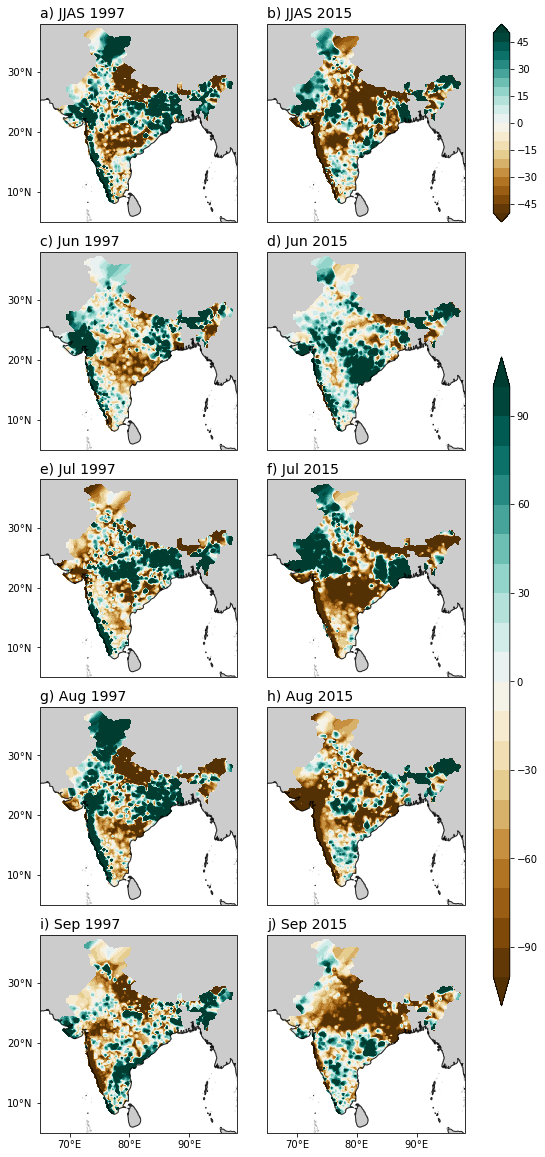

In [22]:
fig, ax = plt.subplots(5,2, figsize=(10,22),subplot_kw={"projection": ccrs.PlateCarree()})

ax[0,0].set_title('a) JJAS 1997',fontsize=14, loc='left')
clevs = [-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,
         10,20,30,40,50,60,70,80,90,100]
clevs2 = [-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,
         5,10,15,20,25,30,35,40,45,50]
cf1 = ax[0,0].contourf(lons,lats,ano_1997_JJAS,clevs2,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,0].coastlines(alpha=0.8)
# ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
# ax[0,0].contourf(lons, lats, tval_1[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)#ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,0].set_extent([65, 98,5 ,37])
ax[0,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax[0,0].xaxis.set_major_formatter(lon_formatter)
ax[0,0].yaxis.set_major_formatter(lat_formatter)
ax[0,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,1].set_title('b) JJAS 2015',fontsize=14, loc='left')
cf2 = ax[0,1].contourf(lons,lats,ano_2015_JJAS,clevs2,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[0,1].coastlines(alpha=0.8)
# ax[0,1].contourf(lons, lats, tval_2[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[0,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,1].set_extent([65, 98,5 ,37])
ax[0,1].xaxis.set_major_formatter(lon_formatter)
ax[0,1].yaxis.set_major_formatter(lat_formatter)
ax[0,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,0].set_title('c) Jun 1997',fontsize=14, loc='left')
cf3 = ax[1,0].contourf(lons,lats,ano_1997_Jun,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,0].coastlines(alpha=0.8)
# ax[1,0].contourf(lons, lats, tval_3[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[1,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,0].set_extent([65, 98,5 ,37])
ax[1,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[1,0].xaxis.set_major_formatter(lon_formatter)
ax[1,0].yaxis.set_major_formatter(lat_formatter)
ax[1,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,1].set_title('d) Jun 2015',fontsize=14, loc='left')
cf4 = ax[1,1].contourf(lons,lats,ano_2015_Jun,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[1,1].coastlines(alpha=0.8)
# ax[1,1].contourf(lons, lats, tval_4[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[1,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,1].set_extent([65, 98,5 ,37])
ax[1,1].xaxis.set_major_formatter(lon_formatter)
ax[1,1].yaxis.set_major_formatter(lat_formatter)
ax[1,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[2,0].set_title('e) Jul 1997',fontsize=14, loc='left')
cf5 = ax[2,0].contourf(lons,lats,ano_1997_Jul,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[2,0].coastlines(alpha=0.8)
# ax[2,0].contourf(lons, lats, tval_5[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
# ax[2,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[2,0].set_extent([65, 98,5 ,37])
ax[2,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[2,0].xaxis.set_major_formatter(lon_formatter)
ax[2,0].yaxis.set_major_formatter(lat_formatter)
ax[2,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[2,1].set_title('f) Jul 2015',fontsize=14, loc='left')
cf6 = ax[2,1].contourf(lons,lats,ano_2015_Jul,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[2,1].coastlines(alpha=0.8)
# ax[2,1].contourf(lons, lats, tval_6[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[2,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[2,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
#ax[2,1].set_yticks([10,15,20,25,30,35],crs=ccrs.PlateCarree())
ax[2,1].set_extent([65, 98,5 ,37])
ax[2,1].xaxis.set_major_formatter(lon_formatter)
ax[2,1].yaxis.set_major_formatter(lat_formatter)
ax[2,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[3,0].set_title('g) Aug 1997',fontsize=14, loc='left')
cf7 = ax[3,0].contourf(lons,lats,ano_1997_Aug,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[3,0].coastlines(alpha=0.8)
# ax[3,0].contourf(lons, lats, tval_7[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[3,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[3,0].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[3,0].set_extent([65, 98,5 ,37])
ax[3,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[3,0].xaxis.set_major_formatter(lon_formatter)
ax[3,0].yaxis.set_major_formatter(lat_formatter)
ax[3,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[3,1].set_title('h) Aug 2015',fontsize=14, loc='left')
cf8 = ax[3,1].contourf(lons,lats,ano_2015_Aug,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[3,1].coastlines(alpha=0.8)
# ax[3,1].contourf(lons, lats, tval_8[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[3,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[3,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[3,1].set_extent([65, 98,5 ,37])
ax[3,1].xaxis.set_major_formatter(lon_formatter)
ax[3,1].yaxis.set_major_formatter(lat_formatter)
ax[3,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[4,0].set_title('i) Sep 1997',fontsize=14, loc='left')
cf9 = ax[4,0].contourf(lons,lats,ano_1997_Sep,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[4,0].coastlines(alpha=0.8)
# ax[4,0].contourf(lons, lats, tval_9[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[4,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[4,0].set_xticks([70,80,90],crs=ccrs.PlateCarree())
ax[4,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[4,0].set_extent([65, 98,5 ,37])
ax[4,0].xaxis.set_major_formatter(lon_formatter)
ax[4,0].yaxis.set_major_formatter(lat_formatter)
ax[4,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[4,1].set_title('j) Sep 2015',fontsize=14, loc='left')
cf10 = ax[4,1].contourf(lons,lats,ano_2015_Sep,clevs,extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.BrBG)
ax[4,1].coastlines(alpha=0.8)
# ax[4,1].contourf(lons, lats, tval_10[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
# ax[4,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[4,1].set_xticks([70,80,90],crs=ccrs.PlateCarree())
ax[4,1].set_extent([65, 98,5 ,37])
ax[4,1].xaxis.set_major_formatter(lon_formatter)
ax[4,1].yaxis.set_major_formatter(lat_formatter)
ax[4,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25,top=0.95,left=0.1,right=0.99,wspace=-0.45,hspace=0.15)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.88, 0.33, 0.023, 0.41])
cbar_ax2 = fig.add_axes([0.88, 0.825, 0.023, 0.125])

# Draw the colorbar
cbar=fig.colorbar(cf3, cax=cbar_ax,orientation='vertical')
cbar2=fig.colorbar(cf1, cax=cbar_ax2,orientation='vertical')

# plt.savefig("rf_Comp_Panel_1997_2015_2.jpg", dpi=600)
plt.show()

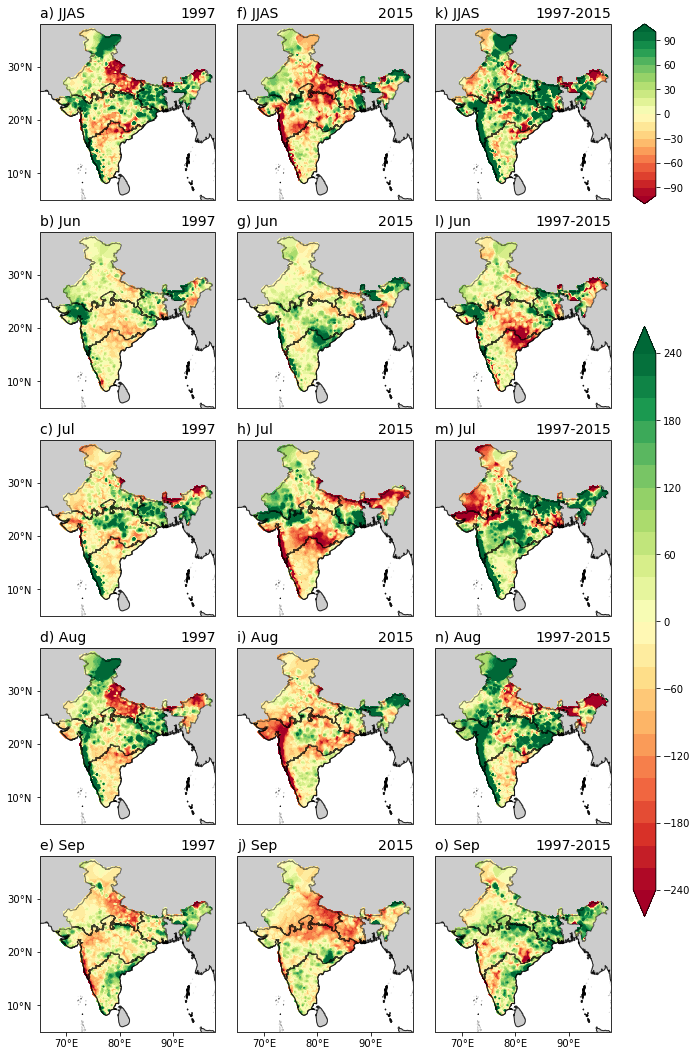

In [44]:
fig, ax = plt.subplots(5,3, figsize=(15,20),subplot_kw={"projection": ccrs.PlateCarree()})

ax[0,0].set_title('a) JJAS',fontsize=14, loc='left')
ax[0,0].set_title('1997',fontsize=14, loc='right')
clevs = [-240,-220,-200,-180,-160,-140,-120,-100,-80,-60,-40,-20,0,
         20,40,60,80,100,120,140,160,180,200,220,240]
clevs2 = [-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,
         10,20,30,40,50,60,70,80,90,100]
cf1 = ax[0,0].contourf(lons,lats,ano_1997_JJAS,clevs2,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[0,0].coastlines(alpha=0.8)
ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
# ax[0,0].contourf(lons, lats, tval_1[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)#ax[0,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,0].set_extent([65, 98,5 ,37])
ax[0,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax[0,0].xaxis.set_major_formatter(lon_formatter)
ax[0,0].yaxis.set_major_formatter(lat_formatter)
ax[0,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,1].set_title('f) JJAS',fontsize=14, loc='left')
ax[0,1].set_title('2015',fontsize=14, loc='right')
cf2 = ax[0,1].contourf(lons,lats,ano_2015_JJAS,clevs2,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[0,1].coastlines(alpha=0.8)
# ax[0,1].contourf(lons, lats, tval_2[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[0,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,1].set_extent([65, 98,5 ,37])
ax[0,1].xaxis.set_major_formatter(lon_formatter)
ax[0,1].yaxis.set_major_formatter(lat_formatter)
ax[0,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[0,2].set_title('k) JJAS',fontsize=14, loc='left')
ax[0,2].set_title('1997-2015',fontsize=14, loc='right')
cf11 = ax[0,2].contourf(lons,lats,diff_JJAS,clevs2,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[0,2].coastlines(alpha=0.8)
# ax[0,1].contourf(lons, lats, tval_2[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[0,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[0,2].set_extent([65, 98,5 ,37])
ax[0,2].xaxis.set_major_formatter(lon_formatter)
ax[0,2].yaxis.set_major_formatter(lat_formatter)
ax[0,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,0].set_title('b) Jun',fontsize=14, loc='left')
ax[1,0].set_title('1997',fontsize=14, loc='right')
cf3 = ax[1,0].contourf(lons,lats,ano_1997_Jun,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[1,0].coastlines(alpha=0.8)
# ax[1,0].contourf(lons, lats, tval_3[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[1,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,0].set_extent([65, 98,5 ,37])
ax[1,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[1,0].xaxis.set_major_formatter(lon_formatter)
ax[1,0].yaxis.set_major_formatter(lat_formatter)
ax[1,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,1].set_title('g) Jun',fontsize=14, loc='left')
ax[1,1].set_title('2015',fontsize=14, loc='right')
cf4 = ax[1,1].contourf(lons,lats,ano_2015_Jun,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[1,1].coastlines(alpha=0.8)
# ax[1,1].contourf(lons, lats, tval_4[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[1,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,1].set_extent([65, 98,5 ,37])
ax[1,1].xaxis.set_major_formatter(lon_formatter)
ax[1,1].yaxis.set_major_formatter(lat_formatter)
ax[1,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[1,2].set_title('l) Jun',fontsize=14, loc='left')
ax[1,2].set_title('1997-2015',fontsize=14, loc='right')
cf12 = ax[1,2].contourf(lons,lats,diff_Jun,clevs,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[1,2].coastlines(alpha=0.8)
# ax[1,1].contourf(lons, lats, tval_4[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[1,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[1,2].set_extent([65, 98,5 ,37])
ax[1,2].xaxis.set_major_formatter(lon_formatter)
ax[1,2].yaxis.set_major_formatter(lat_formatter)
ax[1,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[2,0].set_title('c) Jul',fontsize=14, loc='left')
ax[2,0].set_title('1997',fontsize=14, loc='right')
cf5 = ax[2,0].contourf(lons,lats,ano_1997_Jul,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[2,0].coastlines(alpha=0.8)
# ax[2,0].contourf(lons, lats, tval_5[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(),hatches=['...'],alpha=0)
ax[2,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[2,0].set_extent([65, 98,5 ,37])
ax[2,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[2,0].xaxis.set_major_formatter(lon_formatter)
ax[2,0].yaxis.set_major_formatter(lat_formatter)
ax[2,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[2,1].set_title('h) Jul',fontsize=14, loc='left')
ax[2,1].set_title('2015',fontsize=14, loc='right')
cf6 = ax[2,1].contourf(lons,lats,ano_2015_Jul,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[2,1].coastlines(alpha=0.8)
# ax[2,1].contourf(lons, lats, tval_6[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[2,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[2,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
#ax[2,1].set_yticks([10,15,20,25,30,35],crs=ccrs.PlateCarree())
ax[2,1].set_extent([65, 98,5 ,37])
ax[2,1].xaxis.set_major_formatter(lon_formatter)
ax[2,1].yaxis.set_major_formatter(lat_formatter)
ax[2,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[2,2].set_title('m) Jul',fontsize=14, loc='left')
ax[2,2].set_title('1997-2015',fontsize=14, loc='right')
cf13 = ax[2,2].contourf(lons,lats,diff_Jul,clevs,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[2,2].coastlines(alpha=0.8)
# ax[2,1].contourf(lons, lats, tval_6[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[2,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[2,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
#ax[2,1].set_yticks([10,15,20,25,30,35],crs=ccrs.PlateCarree())
ax[2,2].set_extent([65, 98,5 ,37])
ax[2,2].xaxis.set_major_formatter(lon_formatter)
ax[2,2].yaxis.set_major_formatter(lat_formatter)
ax[2,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[3,0].set_title('d) Aug',fontsize=14, loc='left')
ax[3,0].set_title('1997',fontsize=14, loc='right')
cf7 = ax[3,0].contourf(lons,lats,ano_1997_Aug,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[3,0].coastlines(alpha=0.8)
# ax[3,0].contourf(lons, lats, tval_7[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[3,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[3,0].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[3,0].set_extent([65, 98,5 ,37])
ax[3,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[3,0].xaxis.set_major_formatter(lon_formatter)
ax[3,0].yaxis.set_major_formatter(lat_formatter)
ax[3,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[3,1].set_title('i) Aug',fontsize=14, loc='left')
ax[3,1].set_title('2015',fontsize=14, loc='right')
cf8 = ax[3,1].contourf(lons,lats,ano_2015_Aug,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[3,1].coastlines(alpha=0.8)
# ax[3,1].contourf(lons, lats, tval_8[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[3,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[3,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[3,1].set_extent([65, 98,5 ,37])
ax[3,1].xaxis.set_major_formatter(lon_formatter)
ax[3,1].yaxis.set_major_formatter(lat_formatter)
ax[3,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[3,2].set_title('n) Aug',fontsize=14, loc='left')
ax[3,2].set_title('1997-2015',fontsize=14, loc='right')
cf14 = ax[3,2].contourf(lons,lats,diff_Aug,clevs,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[3,2].coastlines(alpha=0.8)
# ax[3,1].contourf(lons, lats, tval_8[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[3,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
#ax[3,1].set_xticks([70,75,80,85,90,95],crs=ccrs.PlateCarree())
ax[3,2].set_extent([65, 98,5 ,37])
ax[3,2].xaxis.set_major_formatter(lon_formatter)
ax[3,2].yaxis.set_major_formatter(lat_formatter)
ax[3,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)


ax[4,0].set_title('e) Sep',fontsize=14, loc='left')
ax[4,0].set_title('1997',fontsize=14, loc='right')
cf9 = ax[4,0].contourf(lons,lats,ano_1997_Sep,clevs,extend='both',
                       transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[4,0].coastlines(alpha=0.8)
# ax[4,0].contourf(lons, lats, tval_9[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[4,0].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[4,0].set_xticks([70,80,90],crs=ccrs.PlateCarree())
ax[4,0].set_yticks([10,20,30], crs=ccrs.PlateCarree())
ax[4,0].set_extent([65, 98,5 ,37])
ax[4,0].xaxis.set_major_formatter(lon_formatter)
ax[4,0].yaxis.set_major_formatter(lat_formatter)
ax[4,0].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[4,1].set_title('j) Sep',fontsize=14, loc='left')
ax[4,1].set_title('2015',fontsize=14, loc='right')
cf10 = ax[4,1].contourf(lons,lats,ano_2015_Sep,clevs,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[4,1].coastlines(alpha=0.8)
# ax[4,1].contourf(lons, lats, tval_10[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[4,1].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[4,1].set_xticks([70,80,90],crs=ccrs.PlateCarree())
ax[4,1].set_extent([65, 98,5 ,37])
ax[4,1].xaxis.set_major_formatter(lon_formatter)
ax[4,1].yaxis.set_major_formatter(lat_formatter)
ax[4,1].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)

ax[4,2].set_title('o) Sep',fontsize=14, loc='left')
ax[4,2].set_title('1997-2015',fontsize=14, loc='right')
cf15 = ax[4,2].contourf(lons,lats,diff_Sep,clevs,extend='both',
                        transform=ccrs.PlateCarree(),cmap=plt.cm.RdYlGn)
ax[4,2].coastlines(alpha=0.8)
# ax[4,1].contourf(lons, lats, tval_10[1],levels=np.arange(0, 0.1, 0.01),transform=ccrs.PlateCarree(), hatches=['...'], alpha=0)
ax[4,2].add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.5)
ax[4,2].set_xticks([70,80,90],crs=ccrs.PlateCarree())
ax[4,2].set_extent([65, 98,5 ,37])
ax[4,2].xaxis.set_major_formatter(lon_formatter)
ax[4,2].yaxis.set_major_formatter(lat_formatter)
ax[4,2].add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25,top=0.95,left=0.1,right=0.99,wspace=-0.65,
                    hspace=0.18)

# Add a colorbar axis at the bottom of the graph
# cbar_ax = fig.add_axes([0.83, 0.4, 0.021, 0.41])

# Draw the colorbar
# cbar=fig.colorbar(cf3, cax=cbar_ax,orientation='vertical')

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.83, 0.33, 0.021, 0.41])
cbar_ax2 = fig.add_axes([0.83, 0.825, 0.021, 0.125])

# Draw the colorbar
cbar=fig.colorbar(cf3, cax=cbar_ax,orientation='vertical')
cbar2=fig.colorbar(cf1, cax=cbar_ax2,orientation='vertical')

#plt.savefig("rf_Comp_Panel_1997_2015_5.jpg", dpi=600)
plt.show()